

# PEC2: Insights datos Idealista

En esta PEC2, debéis hacer el mismo ejercicio que hemos hecho en el Notebook Insight_Datos_Teleco.ipynb pero con la información de Idealista que se os proporciona junto a este Notebook y el enunciado. El objetivo es, una vez limpiado el dataset, estudiarlo para extraer el máximo número de insights de los datos.



## Cargar librerías

In [1]:
%matplotlib inline

import re
import random
from collections import Counter

import pandas as pd
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
sns.set(color_codes=True)


## 1) Lectura y unificación de datos. Puede ser tanto de la descarga de Idealista si hiciesteis la PEC1 versión con Claves, o directamente los 8 ficheros CSV. (2 puntos)

### 1.1) Comprobar lectura correcta del dataset

In [2]:
df = pd.read_csv("jordiba90_BBDD.csv")
print(df.columns.tolist())

['Unnamed: 0.1', 'Unnamed: 0', 'index', 'propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor', 'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality', 'district', 'country', 'neighborhood', 'latitude', 'longitude', 'showAddress', 'url', 'distance', 'description', 'hasVideo', 'status', 'newDevelopment', 'hasLift', 'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'labels', 'parkingSpace', 'newDevelopmentFinished']


C:\Users\jordi\AppData\Local\Temp\ipykernel_11772\429426130.py:1: DtypeWarning: Columns (23,29,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("jordiba90_BBDD.csv")


In [3]:
#print(df.dtypes)
print(df.iloc[0,[22,29,35,36,37,38,39]])

longitude            2.179157
newDevelopment          False
has3DTour               False
has360                  False
hasStaging              False
superTopHighlight       False
topNewDevelopment       False
Name: 0, dtype: object


In [4]:
cols = [22, 29, 35, 36, 37, 38, 39]
print(df.iloc[:, cols].dtypes.tolist())

[dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]


### 1.2) Comprobar dimensiones del dataset

In [5]:
print("Shapes:", df.shape)

Shapes: (21186, 43)


## 2. Data Wrangling (4 puntos)

### 2.1) Formateo de las variables (strings, numéricas y booleanas)

In [6]:
map_dict = {"bj": 0, "en": 1, "ss": -1, "st": -2}
df["floor"] = df["floor"].replace(map_dict)
df['floor'] = pd.to_numeric(df['floor'])
df['size'] = df['size'].astype(int).round(0)
df['propertyCode'] = df['propertyCode'].astype(str)
df['latitude'] = df['latitude'].astype(str)
df['longitude'] = df['longitude'].astype(str)
df = df.convert_dtypes()
print(df.dtypes)

Unnamed: 0.1                       Int64
Unnamed: 0                         Int64
index                              Int64
propertyCode              string[python]
thumbnail                 string[python]
externalReference         string[python]
numPhotos                          Int64
floor                              Int64
price                              Int64
propertyType              string[python]
operation                 string[python]
size                               Int32
exterior                         boolean
rooms                              Int64
bathrooms                          Int64
address                   string[python]
province                  string[python]
municipality              string[python]
district                  string[python]
country                   string[python]
neighborhood              string[python]
latitude                  string[python]
longitude                 string[python]
showAddress                      boolean
url             

In [7]:
print(df.iloc[0,[22,29,35,36,37,38,39]])

longitude            2.1791571
newDevelopment           False
has3DTour                False
has360                   False
hasStaging               False
superTopHighlight        False
topNewDevelopment        False
Name: 0, dtype: object


In [8]:
cols = [22, 29, 35, 36, 37, 38, 39]
print(df.iloc[:, cols].dtypes.tolist())

[string[python], BooleanDtype, BooleanDtype, BooleanDtype, BooleanDtype, BooleanDtype, BooleanDtype]


### 2.2) Comprobación y eliminación de registros repetidos

In [9]:
df = df.drop_duplicates()
print("Shapes:", df.shape)

Shapes: (18468, 43)


### 2.3) Comprobación de columnas que no aportan información

In [10]:
# df.describe
df = df.iloc[:, 3:-3]
print(df.head(1))

  propertyCode                                          thumbnail   
0     37423711  https://img3.idealista.com/blur/WEB_LISTING/0/...  \

  externalReference  numPhotos  floor   price propertyType operation  size   
0            Z-2030         31      2  285000         flat      sale    63  \

   exterior  rooms  bathrooms          address   province municipality   
0      True      2          2  barrio El Gòtic  Barcelona    Barcelona  \

       district country neighborhood    latitude  longitude  showAddress   
0  Ciutat Vella      es     El Gòtic  41.3802156  2.1791571        False  \

                                            url  distance   
0  https://www.idealista.com/inmueble/37423711/      1070  \

                                         description  hasVideo status   
0  Un estilo de vida urbano en un entorno lleno d...     False   good  \

   newDevelopment  hasLift  priceByArea          detailedType   
0           False     True         4524  {'typology': 'flat'}  \

 

### 2.4) Estudio de la varianza para las variables numéricas

In [11]:
df_num = df.iloc[:, 1:].select_dtypes(include='number')
print(df_num.var())

numPhotos      2.073212e+02
floor          5.501337e+00
price          7.493879e+10
size           3.192378e+05
rooms          2.057511e+00
bathrooms      9.115542e-01
distance       2.360578e+08
priceByArea    3.195212e+06
dtype: float64


### 2.5) Estudio de agrupaciones para las variables categóricas

In [12]:
df_cat = df.select_dtypes(include=["string"])
print(df_cat.describe())

       propertyCode                                          thumbnail   
count         18468                                              18354  \
unique        13091                                              13097   
top        97210022  https://img3.idealista.com/blur/WEB_LISTING/0/...   
freq             17                                                 17   

       externalReference propertyType operation   
count              16310        18468     18468  \
unique             11091            5         2   
top                 XXXX         flat      sale   
freq                  95        13023     18400   

                                address   province municipality  district   
count                             18468      18400        18468     14467  \
unique                             6855         18          380       351   
top     Gran Via de les Corts Catalanes  Barcelona    Barcelona  Eixample   
freq                                141       7360         6329  

### 2.6) Comprobación y eliminación de nulos

In [13]:
df = df.dropna()
print("Shapes:", df.shape)

Shapes: (8405, 37)


### 2.7) Comprobación y eliminación de outliers

In [14]:
for col in df_num.columns:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df_num = df.iloc[:, 1:].select_dtypes(include='number')
df_cat = df.select_dtypes(include=["string"])

### 2.8) Comprobar dimensiones y balanceo del dataset (tras terminar limpieza del dataset)

Shapes: (7463, 37)
       numPhotos     floor          price       size     rooms  bathrooms   
count     7463.0    7463.0         7463.0     7463.0    7463.0     7463.0  \
mean   26.719416  2.876055  312943.503015  93.885167  2.956988   1.509983   
std    10.340987  2.194885     168388.675  34.154776  1.053335   0.580091   
min          6.0       0.0       102000.0       35.0       1.0        1.0   
25%         19.0       1.0       199000.0       69.0       2.0        1.0   
50%         26.0       2.0       269000.0       88.0       3.0        1.0   
75%         32.0       4.0       365000.0      110.0       4.0        2.0   
max         64.0      10.0      1550000.0      240.0       5.0        3.0   

          distance  priceByArea  
count       7463.0       7463.0  
mean   3157.955648  3431.814418  
std    2613.733113  1338.294432  
min          350.0       1093.0  
25%         1466.0       2462.0  
50%         2495.0       3242.0  
75%         3935.0       4225.5  
max        1411

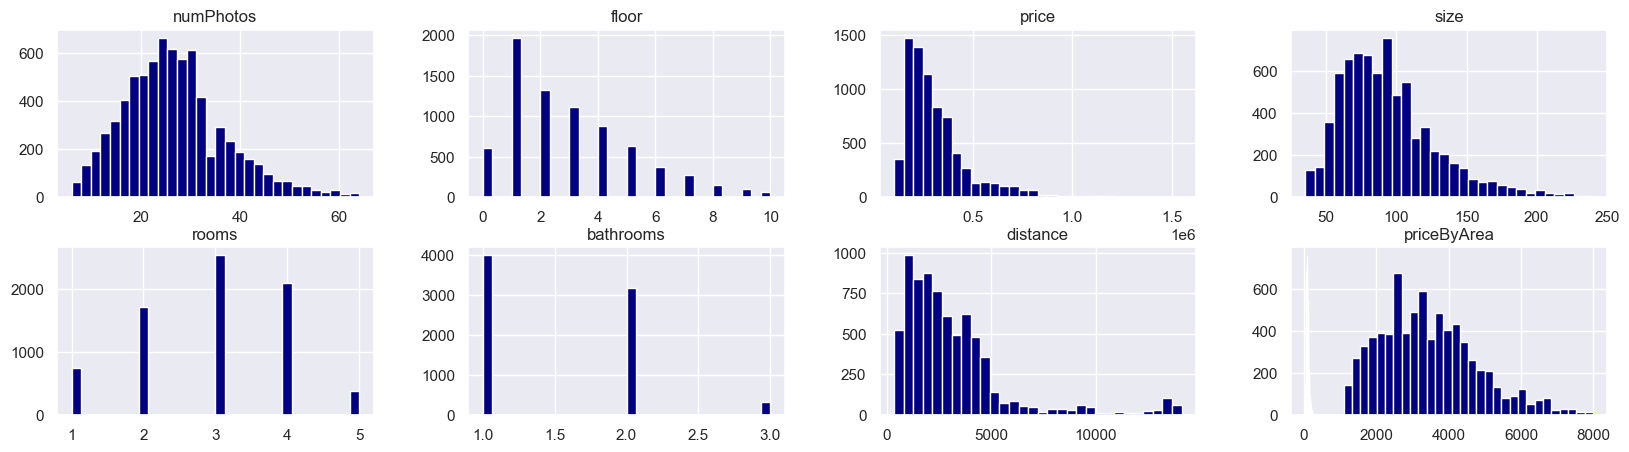

In [15]:
print("Shapes:", df.shape)

# Resumen estadístico de las variables numéricas
print(df_num.describe())

# Histograma de las variables numéricas
df_num.hist(figsize=(20, 5), layout=(2, 4), bins=30, color='navy')
df['size'].hist(bins=30)
plt.show()

In [16]:
print(df.head(1))

  propertyCode                                          thumbnail   
0     37423711  https://img3.idealista.com/blur/WEB_LISTING/0/...  \

  externalReference  numPhotos  floor   price propertyType operation  size   
0            Z-2030         31      2  285000         flat      sale    63  \

   exterior  rooms  bathrooms          address   province municipality   
0      True      2          2  barrio El Gòtic  Barcelona    Barcelona  \

       district country neighborhood    latitude  longitude  showAddress   
0  Ciutat Vella      es     El Gòtic  41.3802156  2.1791571        False  \

                                            url  distance   
0  https://www.idealista.com/inmueble/37423711/      1070  \

                                         description  hasVideo status   
0  Un estilo de vida urbano en un entorno lleno d...     False   good  \

   newDevelopment  hasLift  priceByArea          detailedType   
0           False     True         4524  {'typology': 'flat'}  \

 

## 3. Análisis Exploratorio de Datos (4 puntos)

### 3.1) Estudio de las variables categóricas

In [17]:
print(df_cat)

      propertyCode                                          thumbnail   
0         37423711  https://img3.idealista.com/blur/WEB_LISTING/0/...  \
3         96266051  https://img3.idealista.com/blur/WEB_LISTING/0/...   
5         98225620  https://img3.idealista.com/blur/WEB_LISTING/0/...   
6         99771151  https://img3.idealista.com/blur/WEB_LISTING/0/...   
8         99779354  https://img3.idealista.com/blur/WEB_LISTING/0/...   
...            ...                                                ...   
20703     98194963  https://img3.idealista.com/blur/WEB_LISTING/0/...   
20794     97631617  https://img3.idealista.com/blur/WEB_LISTING/0/...   
20927     99760964  https://img3.idealista.com/blur/WEB_LISTING/0/...   
20974     28340068  https://img3.idealista.com/blur/WEB_LISTING/0/...   
21147     97960869  https://img3.idealista.com/blur/WEB_LISTING/0/...   

         externalReference propertyType operation   
0                   Z-2030         flat      sale  \
3                

### 3.2) Convertir 3 variables categóricas a dummy. Se recomienda utilizar variables que no contengan demasiados posibles valores.

In [18]:
dummies = pd.get_dummies(df[['exterior', 'newDevelopment', 'hasLift']])
print(df.head(1))

  propertyCode                                          thumbnail   
0     37423711  https://img3.idealista.com/blur/WEB_LISTING/0/...  \

  externalReference  numPhotos  floor   price propertyType operation  size   
0            Z-2030         31      2  285000         flat      sale    63  \

   exterior  rooms  bathrooms          address   province municipality   
0      True      2          2  barrio El Gòtic  Barcelona    Barcelona  \

       district country neighborhood    latitude  longitude  showAddress   
0  Ciutat Vella      es     El Gòtic  41.3802156  2.1791571        False  \

                                            url  distance   
0  https://www.idealista.com/inmueble/37423711/      1070  \

                                         description  hasVideo status   
0  Un estilo de vida urbano en un entorno lleno d...     False   good  \

   newDevelopment  hasLift  priceByArea          detailedType   
0           False     True         4524  {'typology': 'flat'}  \

 

### 3.3) Crear variables derivadas en caso que nos parezca interesante incluir alguna

In [19]:
df_num['pricePerRoom'] = df['price'] / df['rooms'] # kpi más bajo es mejor
df_num['pricePerBathroom'] = df['price'] / df['bathrooms'] # kpi más bajo es mejor
df_num['pricePerFloor'] = df['price'] / df['floor'] # kpi más bajo es mejor

In [20]:
print(df.head(1))

  propertyCode                                          thumbnail   
0     37423711  https://img3.idealista.com/blur/WEB_LISTING/0/...  \

  externalReference  numPhotos  floor   price propertyType operation  size   
0            Z-2030         31      2  285000         flat      sale    63  \

   exterior  rooms  bathrooms          address   province municipality   
0      True      2          2  barrio El Gòtic  Barcelona    Barcelona  \

       district country neighborhood    latitude  longitude  showAddress   
0  Ciutat Vella      es     El Gòtic  41.3802156  2.1791571        False  \

                                            url  distance   
0  https://www.idealista.com/inmueble/37423711/      1070  \

                                         description  hasVideo status   
0  Un estilo de vida urbano en un entorno lleno d...     False   good  \

   newDevelopment  hasLift  priceByArea          detailedType   
0           False     True         4524  {'typology': 'flat'}  \

 

### 3.4) Cálculo de la matriz de correlación

In [21]:
correlation_matrix = df_num.corr()
print(correlation_matrix)

                  numPhotos     floor     price      size     rooms   
numPhotos          1.000000  0.058326  0.236541  0.328000  0.238570  \
floor              0.058326  1.000000  0.056749  0.030752  0.049631   
price              0.236541  0.056749  1.000000  0.566325  0.328906   
size               0.328000  0.030752  0.566325  1.000000  0.604204   
rooms              0.238570  0.049631  0.328906  0.604204  1.000000   
bathrooms          0.299021  0.001551  0.469238  0.675416  0.477180   
distance          -0.011760  0.040353 -0.216251  0.089557  0.039097   
priceByArea       -0.007451  0.071129  0.633438 -0.202463 -0.195969   
pricePerRoom      -0.016531  0.064449  0.532890 -0.007074 -0.504712   
pricePerBathroom   0.009468  0.077898  0.642465  0.056852 -0.039165   
pricePerFloor      0.106393 -0.588455  0.589964  0.350682  0.212608   

                  bathrooms  distance  priceByArea  pricePerRoom   
numPhotos          0.299021 -0.011760    -0.007451     -0.016531  \
floor      

### 3.5) Pintar la matriz de correlación

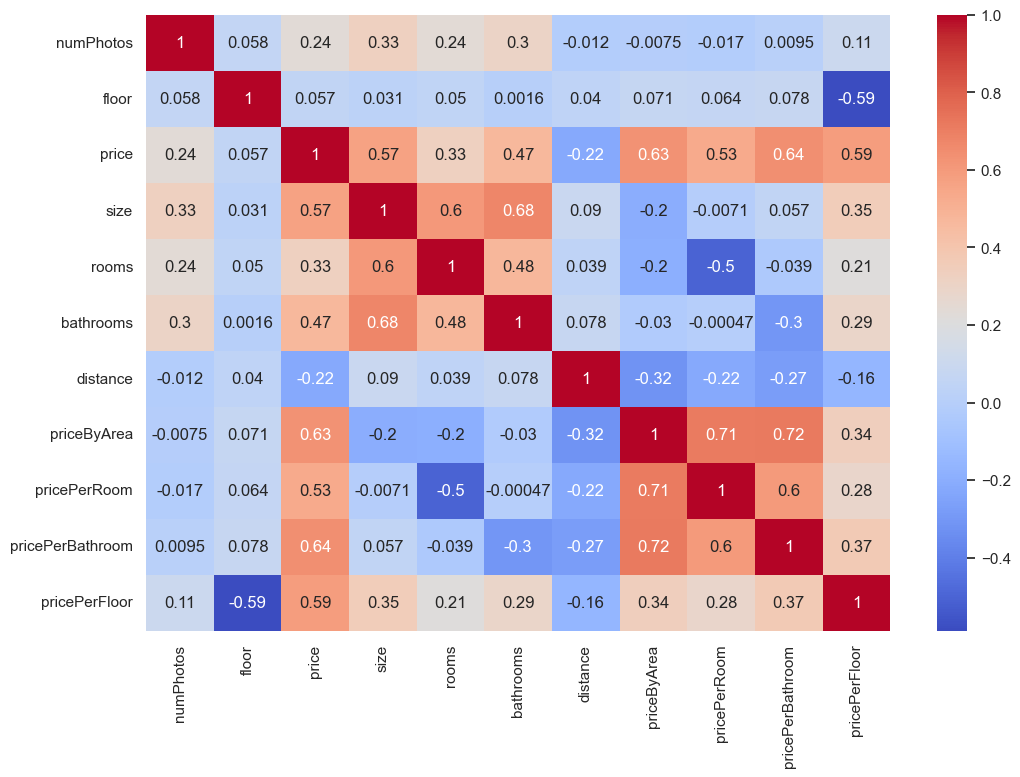

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 3.6) Comprobar si hay variables correlacionadas

In [24]:
threshold = 0.7

correlated_vars = set()
for i in range(len(correlation_matrix.abs().columns)):
    for j in range(i):
        if correlation_matrix.abs().iloc[i, j] >= threshold:
            colname = correlation_matrix.abs().columns[i]
            correlated_vars.add(colname)

print(correlated_vars)

{'pricePerRoom', 'pricePerBathroom'}
